# Road map

##### This code shows how to get a Road Map from a Beamng.tech can be plotted using python :)

### Autor:
###### Héctor Robles
### Github:
###### https://github.com/Hector290601
### Web Page:
###### https://hector290601.github.io/about/#/

Import the necessary librearies to work. <br>
1 Shapely's needed to change from the raw data to the plot lines. <br>
2 Matplotlib's needed to plot the lines previusly getted. <br>
3 Beamngpy's needed to connect python with Beamng.tech <br>

In [6]:
from shapely.geometry import MultiLineString
from matplotlib import pyplot as plt
from beamngpy import BeamNGpy, Vehicle, Scenario


Open the simulator. <br>
1 bng is the simulator running :) <br>
###### remember to change the home path with your work path and use double slash '\\\\' to correct function :)

In [15]:
bng = BeamNGpy(
    'localhost',
    64256,
    home='C:\\Users\\hrmha\\Documents\\BeamNG.tech\\BeamNG.tech.v0.21.3.0'
)

bng.open()

Create and load the west coast usa scenario, named roadMap

In [16]:
scenario = Scenario('west_coast_usa', 'roadMap')

scenario.make(bng)

bng.load_scenario(scenario)

bng.start_scenario()

Create and add the vehicle c:

In [17]:
vehicle = Vehicle(
    'ego_vehicle',
    model='pickup',
    licence='PYTHON'
)

orig = (568.908386, 13.4217358,  148.56546)

scenario.add_vehicle(vehicle, orig)

Get the roads from the map c:

In [18]:
roads = bng.get_roads()
roadNames = list(roads.keys())
roadSpec = {}

for rId, rInf in roads.items():
    if rInf['drivability'] != '-1':
        roadSpec[rId] = bng.get_road_edges(rId)

Change the raw data roads from raw to plottable lines.

In [19]:
road = list()
lines = list()

for rId in roadSpec.keys():
    left = list()
    right = list()
    for rPoint in roadSpec[rId]:
        x = rPoint['left'][0]
        y = rPoint['left'][1]
        left.append((x, y))
        x = rPoint['right'][0]
        y = rPoint['right'][1]
        right.append((x, y))
    if left:
        lines.append(tuple(left))
    if right:
        lines.append(tuple(right))
network = MultiLineString(lines)

Plot the lines and save the map

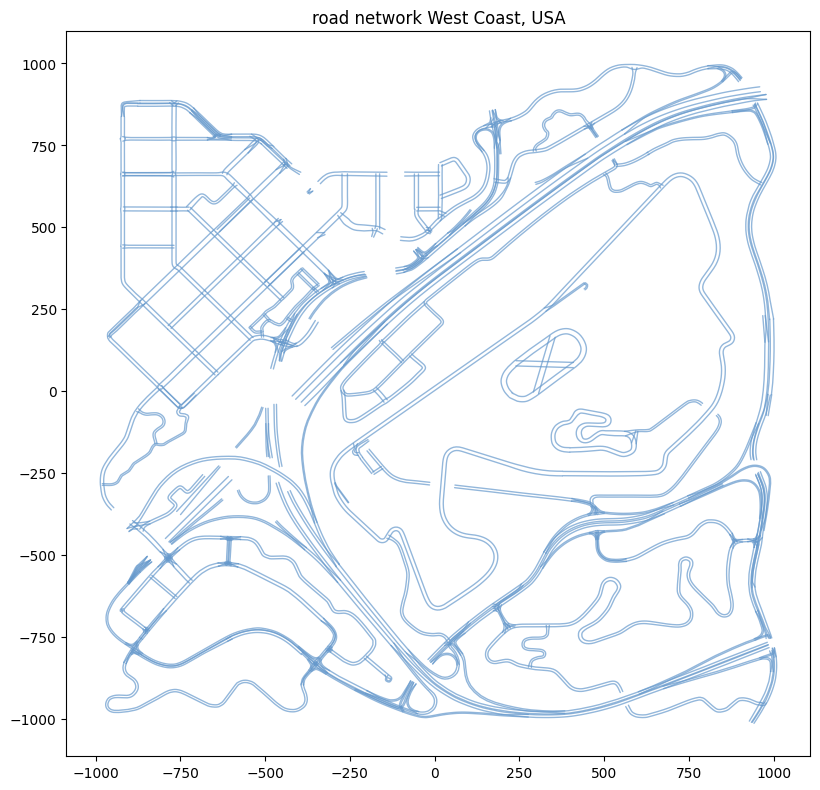

In [20]:
def plotLines(ax, ob):
    color = '#6699cc'
    for line in ob:
        x, y = line.xy
        ax.plot(x, y, color=color, linewidth=1, solid_capstyle='round', zorder=2, alpha=0.7)

fig = plt.figure(1, figsize=[9.6, 9.6], dpi=100)

ax = fig.add_subplot()
plotLines(ax, network)

# _ = ax.set_axis_off()
_ = ax.set_title('road network West Coast, USA')
plt.savefig("leftright.png")

